Higher Education Policy -- Public expenditure on education as percentage of total government expenditure
http://cn.knoema.com/atlas/topics/%E6%95%99%E8%82%B2/%E6%95%99%E8%82%B2%E6%94%AF%E5%87%BA/%E6%95%99%E8%82%B2%E6%94%AF%E5%87%BA%E5%8D%A0GNI%E7%9A%84%E7%99%BE%E5%88%86%E6%AF%94

Socio-economic Factors 

-- Technology(number of panels and dissertations)
dissertations:http://cn.knoema.com/atlas/topics/%E7%A0%94%E5%8F%91/%E7%A0%94%E5%8F%91%E6%94%AF%E5%87%BA/%E7%A7%91%E6%8A%80%E6%9C%9F%E5%88%8A%E8%AE%BA%E6%96%87
panels:http://cn.knoema.com/atlas/topics/%E7%A0%94%E5%8F%91/%E4%B8%93%E5%88%A9%E7%94%B3%E8%AF%B7%E4%B9%A6/%E5%B8%B8%E4%BD%8F%E4%BA%BA%E5%91%98%E7%94%B3%E8%AF%B7%E4%B8%93%E5%88%A9
-- social mobility
Mobility is most often quantitatively measured in terms of change in economic mobility such as changes in income or wealth. 
Intergenerational mobility: https://commons.wikimedia.org/wiki/File:Intergenerational_mobility_graph-1.jpg
japan：https://waseda.pure.elsevier.com/en/publications/intergenerational-mobility-of-earnings-and-income-in-japan
-- Social Equality(Gini coefficient)
https://commons.wikimedia.org/wiki/File:2014_Gini_Index_World_Map,_income_inequality_distribution_by_country_per_World_Bank.svg
https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings/europe

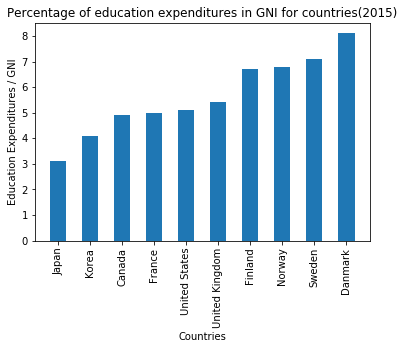

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
Source of data: Knoema Dataset - Education expenditures.

Use percentage of education expenditures in GNI(gross national income) to represent for government's input for
/education policy. The higher the percent is, the more emphasis put by government on education.
'''

data = {'Country': ['Canada','Danmark','Finland','France','Japan','Korea','Norway','Sweden','United States','United Kingdom'],
  'Education_Expenditures_GNI2015':[4.9,8.1,6.7,5.0,3.1,4.1,6.8,7.1,5.1,5.4],
  'Amount of Papers2013': [57797,12482,10157,72555,103377,58844,9854,19362,412543,97332],
  'Amount of panel by residents2015': [4277,1462,1289,14306,258839,167275,1153,2038,288335,14867],
  'Intergenerational mobility 2006': [0.19,0.15,0.18,0.41,0.37,0.0,0.17,0.27,0.47,0.5],
  'Gini coefficient': [33.68,0.0,27.12,33.1,32.11,0.0,25.9,27.32,41.06,32.57]}

assert isinstance(data, dict)

x = list(range(10))
y = data['Education_Expenditures_GNI2015']
my_xticks = data['Country']
zipped = zip(my_xticks, y)
zipped.sort(key = lambda t: t[1])
ly = [i[1] for i in zipped]
lx = [i[0] for i in zipped]
plt.xticks(x, lx,rotation = "vertical")
plt.bar(x, ly, 0.5)
plt.title("Percentage of education expenditures in GNI for countries(2015)")
plt.xlabel("Countries")
plt.ylabel("Education Expenditures / GNI")
#plt.grid()
plt.show()

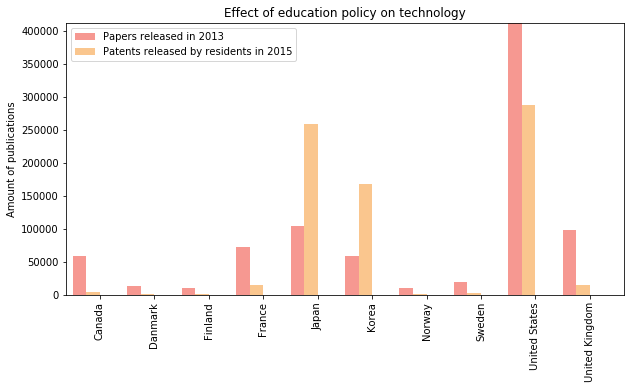

In [2]:
'''
Source of data: Knoema Dataset - Research expenditures
The release amount of papers and patents are applied to measure the technology level of a country.
'''

assert isinstance(data, dict)
assert isinstance(data['Amount of Papers2013'], list)
assert isinstance(data['Amount of panel by residents2015'], list)

raw_data = {'Country': ['Canada','Danmark','Finland','France','Japan','Korea','Norway','Sweden','United States','United Kingdom'],
  'Education_Expenditures_GNI2015':[4.9,8.1,6.7,5.0,3.1,4.1,6.8,7.1,5.1,5.4],
  'Amount of Papers2013': [57797,12482,10157,72555,103377,58844,9854,19362,412543,97332],
  'Amount of panel by residents2015': [4277,1462,1289,14306,258839,167275,1153,2038,288335,14867],
  'Intergenerational mobility 2006': [0.19,0.15,0.18,0.41,0.37,0.0,0.17,0.27,0.47,0.5],
  'Gini coefficient': [33.68,0.0,27.12,33.1,32.11,0.0,25.9,27.32,41.06,32.57]}
df = pd.DataFrame(raw_data, columns = ['Country','Education_Expenditures_GNI2015','Amount of Papers2013','Amount of panel by residents2015','Intergenerational mobility 2006','Gini coefficient'])

# Setting the positions and width for the bars
pos = list(range(10)) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Paper Amount data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Amount of Papers2013'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in country
        label=df['Country'][0]) 

# Create a bar with Panel Amount data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['Amount of panel by residents2015'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Country'][1]) 

# Set the y axis label
ax.set_ylabel('Amount of publications')

# Set the chart's title
ax.set_title('Effect of education policy on technology')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
plt.xticks(rotation='vertical')

# Set the labels for the x ticks
ax.set_xticklabels(df['Country'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Amount of Papers2013'])] )

# Adding the legend and showing the plot
plt.legend(['Papers released in 2013', 'Patents released by residents in 2015'], loc='upper left')
#plt.grid()
plt.show()

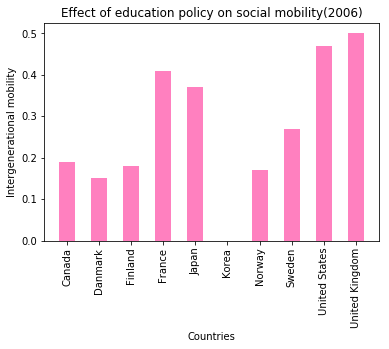

In [3]:
'''
Source of data: Economic Mobility Project, Corak, Miles.2006, 13 no.1: 143-188; Ueda, A. (2009). 
/Intergenerational mobility of earnings and income in Japan. B.E. Journal of Economic Analysis and Policy, 9(1), [54].

Zero for countries of which the social mobility statistic is not available.

Social mobility is the movement of individuals, families, households, or other categories of people within or between 
/social strata in a society. It is a change in social status relative to one's current social location within a given 
/society(from wiki). If the intergenerational mobility is small, then the change in social status would be more 
/frequent. In other words, it would be more possible to get economic returns if one make enough efforts.
'''

assert isinstance(data, dict)
assert isinstance(data['Amount of Papers2013'], list)
assert isinstance(data['Amount of panel by residents2015'], list)

data = {'Country': ['Canada','Danmark','Finland','France','Japan','Korea','Norway','Sweden','United States','United Kingdom'],
  'Education_Expenditures_GNI2015':[4.9,8.1,6.7,5.0,3.1,4.1,6.8,7.1,5.1,5.4],
  'Amount of Papers2013': [57797,12482,10157,72555,103377,58844,9854,19362,412543,97332],
  'Amount of panel by residents2015': [4277,1462,1289,14306,258839,167275,1153,2038,288335,14867],
  'Intergenerational mobility 2006': [0.19,0.15,0.18,0.41,0.37,0.0,0.17,0.27,0.47,0.5],
  'Gini coefficient': [33.68,0.0,27.12,33.1,32.11,0.0,25.9,27.32,41.06,32.57]}

x = list(range(10))
y = data['Intergenerational mobility 2006']
my_xticks = data['Country']
plt.xticks(x, my_xticks, rotation = "vertical")
plt.bar(x, y, 0.5, color = '#ff80bf')
plt.title("Effect of education policy on social mobility(2006)")
plt.xlabel("Countries")
plt.ylabel("Intergenerational mobility")
#plt.grid()
plt.show()

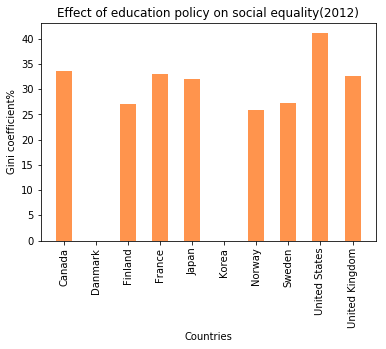

In [4]:
'''
Source of data: https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings/europe
Use Gini Coefficient to represent for social equality.
The Gini coefficient measures the inequality among values of a frequency distribution.
/A Gini coefficient of zero expresses perfect equality, where all values are the same.
/A Gini coefficient of 1 (or 100%) expresses maximal inequality among values.
'''

data = {'Country': ['Canada','Danmark','Finland','France','Japan','Korea','Norway','Sweden','United States','United Kingdom'],
  'Education_Expenditures_GNI2015':[4.9,8.1,6.7,5.0,3.1,4.1,6.8,7.1,5.1,5.4],
  'Amount of Papers2013': [57797,12482,10157,72555,103377,58844,9854,19362,412543,97332],
  'Amount of panel by residents2015': [4277,1462,1289,14306,258839,167275,1153,2038,288335,14867],
  'Intergenerational mobility 2006': [0.19,0.15,0.18,0.41,0.37,0.0,0.17,0.27,0.47,0.5],
  'Gini coefficient': [33.68,0.0,27.12,33.1,32.11,0.0,25.9,27.32,41.06,32.57]}

x = list(range(10))
y = data['Gini coefficient']
my_xticks = data['Country']
plt.xticks(x, my_xticks, rotation = "vertical")
plt.bar(x, y, 0.5, color = '#ff944d')
plt.title("Effect of education policy on social equality(2012)")
plt.xlabel("Countries")
plt.ylabel("Gini coefficient%")
#plt.grid()
plt.show()